In [1]:
#step1:创建空图
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#创建什么都没有的空图
G=nx.DiGraph() 
np.random.seed(1)

In [9]:
#Adarb2.iNeuron, astrocytes, endothelial, L2/3.eNeuron, L4.eNeuron, L5.eNeuron, L6.eNeuron，Lhx6.iNeuron，microglia，mural，Olig，OPC
# 边的起点
start = ["L5.eNeuron","Lhx6.iNeuron"]
# 边的重点
end = ["Adarb2.iNeuron","astrocytes","endothelial","L2/3.eNeuron","L4.eNeuron","L5.eNeuron","L6.eNeuron",
         "Lhx6.iNeuron","microglia","mural","Olig","OPC" ]
# 边的权重
value = [0, 0, 0, 0, 0, 0, 0.069, 0, 0.074, 0, 0.090, 0.066,
         0.047, 0.025, 0.046, 0.042, 0.040,0.045, 0.004,0.047, 0.015,0.025,0.035,0.044]


In [13]:
i = 0
for u,v in G.edges:
    if i < 24:
        G.add_edge(u, v, weight = value[i])
        i = i+1

In [14]:
for i in range(0, len(start)):
    for j in range(0, len(end)):
        G.add_edges_from([(start[i], end[j])])

In [16]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] >= 0.018)]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0.018]

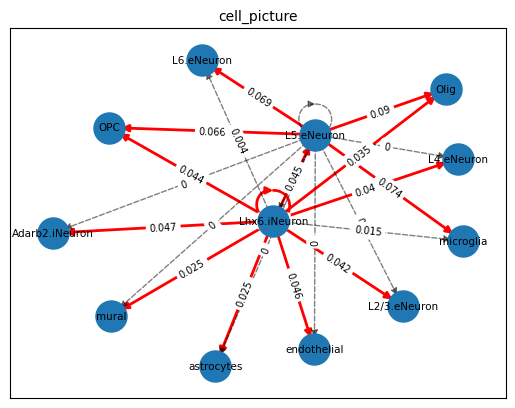

In [17]:
# 画图。
pos = nx.spring_layout(G)

# nodes             定义节点的颜色：node_color = "b"

nx.draw_networkx_nodes(G, pos, node_size = 500)  
 
# edges
nx.draw_networkx_edges(G, pos, edgelist = elarge,
                       width = 2 , alpha = 1, edge_color = 'r',style = 'solid')

nx.draw_networkx_edges(G, pos, edgelist = esmall,
                       width = 1 , alpha = 0.5, edge_color = 'k', style = 'dashed')
# 画出边权值
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, font_size = 7 ,edge_labels = edge_labels)
 
# labels
nx.draw_networkx_labels(G, pos, font_size =7.5, font_family = "sans-serif")
# plt.axis("off")
plt.title("cell_picture", fontsize=10)
plt.show()